Fourth figure of the manuscript, showing Cross-correlation analyses. 
- Fitting results
- brain maps
- correlations of spatial parameter b with timescales for LFP and gamma

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import bootstrap, ttest_rel

from mnitimescales import plots, utils

plots._set_font_params()

Imports and definitions:

In [10]:
stages = ["W", "N3", "R"]
stage_colors = {"W": "red", "N2": "cyan", "N3": "purple", "R": "green"}
type_colors = {"broadband": "peru", "gamma": "slategrey"}
title_dict = {"W": "Wake", "N2": "NREM2", "N3": "NREM3", "R": "REM"}
corr_type = "spearman"

# Paths
data_path = Path("F:\\MNIOpen")
sc_path = data_path.joinpath("Results", "sc_broadband")
sc_gamma_path = data_path.joinpath("Results", "sc_gamma")
tau_path = data_path.joinpath("Results", "timescales_broadband")
tau_gamma_path = data_path.joinpath("Results", "timescales_gamma")
fig_path = data_path.joinpath("Figures", "Fig_sc")
fig_path.mkdir(exist_ok=True, parents=True)

# Dataframe with data on SC
df_sc_bb = {
    stage: pd.read_csv(sc_path.joinpath(f"sc_{stage}.csv"), index_col=0)
    for stage in stages
}
df_sc_gamma = {
    stage: pd.read_csv(sc_gamma_path.joinpath(f"sc_{stage}.csv"), index_col=0)
    for stage in stages
}
# Dataframe with the fit parameters on correlation
df_params_corr_bb = {
    stage: pd.read_csv(sc_path.joinpath(f"sc_params_{stage}_fit_corr.csv"), index_col=0)
    for stage in stages
}
df_params_corr_gamma = {
    stage: pd.read_csv(
        sc_gamma_path.joinpath(f"sc_params_{stage}_fit_corr.csv"), index_col=0
    )
    for stage in stages
}

# Dataframe with timescales for all electrodes
df_timescales_bb = pd.read_csv(tau_path.joinpath("tau_stages.csv"), index_col=0)
df_timescales_gamma = pd.read_csv(
    tau_gamma_path.joinpath("tau_stages.csv"), index_col=0
)

# Average values from LMEs
df_avg_bb = pd.read_csv(sc_path.joinpath("sc_bb_regions.csv"))
df_avg_gamma = pd.read_csv(sc_gamma_path.joinpath("sc_gamma_regions.csv"))
df_avg_d_bb = pd.read_csv(sc_path.joinpath("sc_bb_dists.csv"))
df_avg_d_gamma = pd.read_csv(sc_gamma_path.joinpath("sc_gamma_dists.csv"))
df_avg_tau_bb = pd.read_csv(tau_path.joinpath("timescales_bb_regions.csv"))
df_avg_tau_gamma = pd.read_csv(tau_gamma_path.joinpath("timescales_gamma_regions.csv"))

# Map of coordinates of MNI atlas
map_coords = pd.read_csv(
    data_path.joinpath("Data", "Parcellation", "mnia_centroids_coords.csv"), index_col=0
)

### A) Plot Correlation vs distance plots 

Broadband:

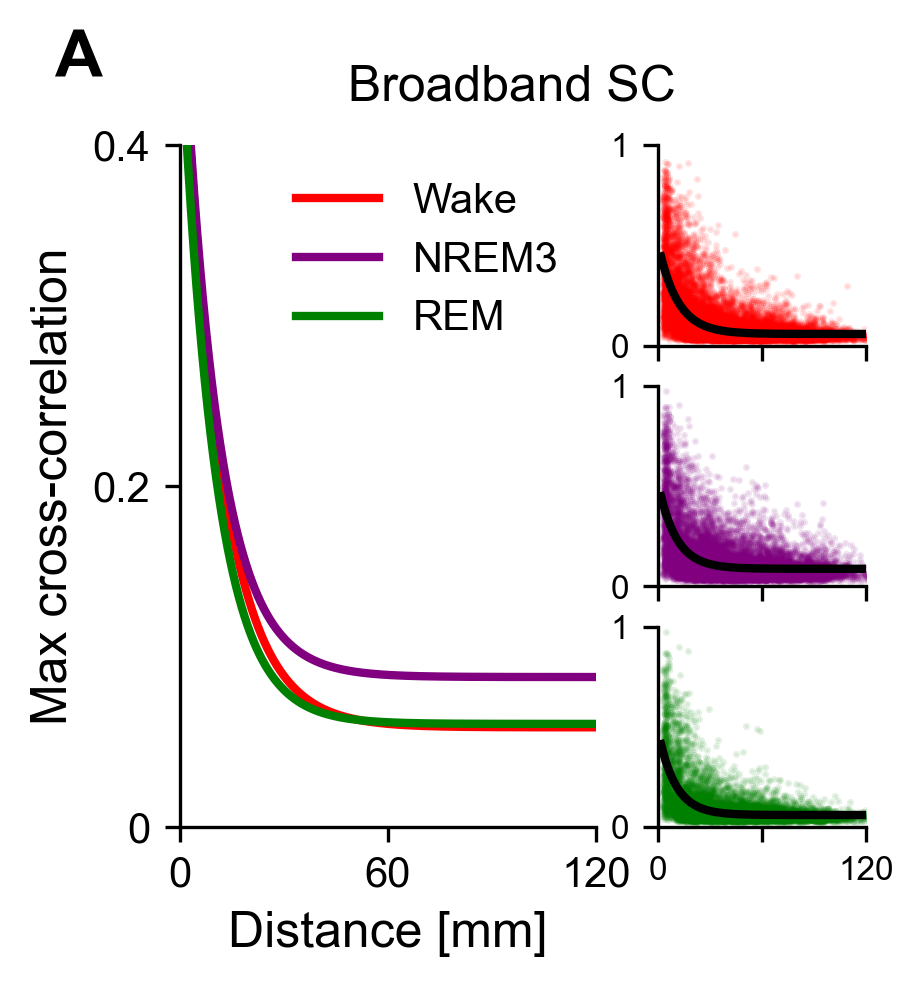

In [37]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze()
    for stage, par in df_params_corr_bb.items()
}

fig, axs = plots.plot_sc_fit(
    df_sc_bb,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(7.5, 7.5),
)

# Adjust plot
axs[0].set_ylim(0, 0.4)
axs[0].set_yticks([0, 0.2, 0.4], labels=[0, 0.2, 0.4], fontsize=plots.fsize.TICK_SIZE)
# axs[0].set_title("Broadband SC", fontsize=plots.fsize.TITLE_SIZE)
fig.suptitle("Broadband SC", y=0.97, fontsize=plots.fsize.TITLE_SIZE)

# Annotate panel
axs[0].text(-0.3, 1.1, "A", transform=axs[0].transAxes, size=16, weight="bold")

plots.save_figure(fig, fig_path.joinpath("Fit_corr_broadband.svg"))
plt.show()

Gamma:

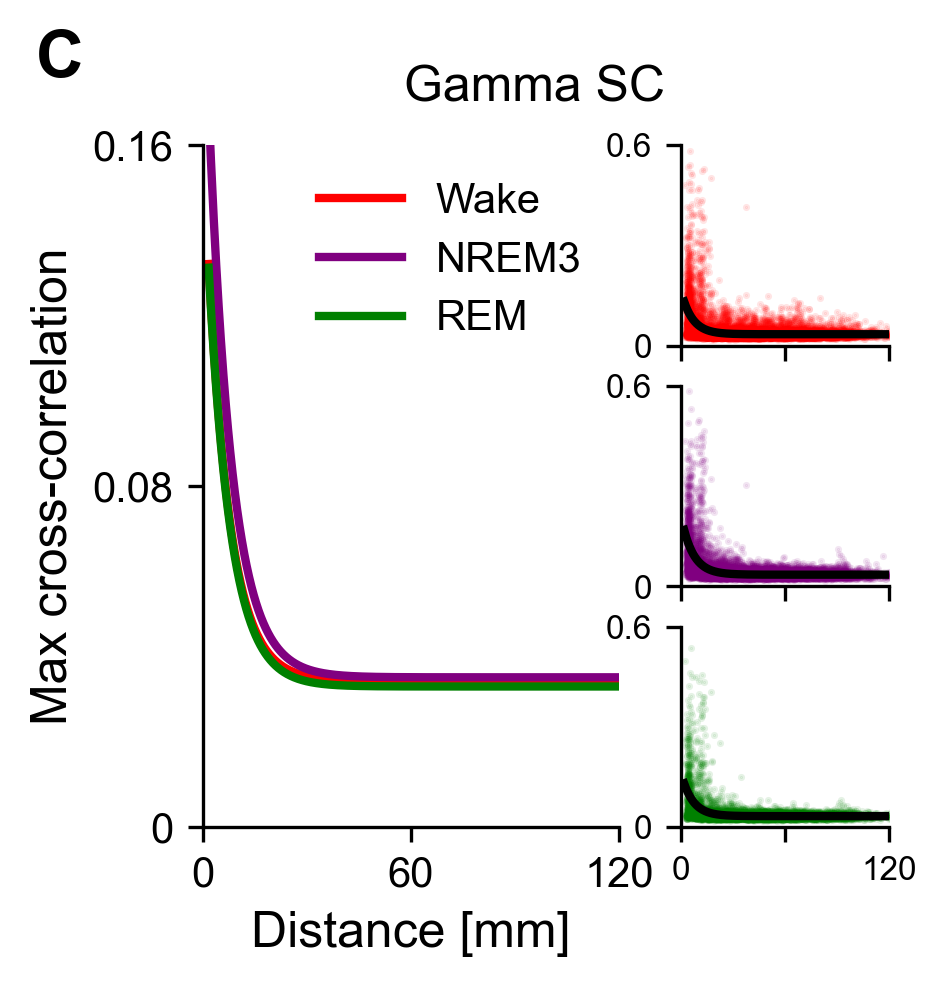

In [36]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze()
    for stage, par in df_params_corr_gamma.items()
}

fig, axs = plots.plot_sc_fit(
    df_sc_gamma,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(7.5, 7.5),
)

# Adjust plot
axs[0].set_ylim(0, 0.16)
axs[0].set_yticks(
    [0, 0.08, 0.16], labels=[0, 0.08, 0.16], fontsize=plots.fsize.TICK_SIZE
)
# axs[0].set_title("Gamma SC", fontsize=plots.fsize.TITLE_SIZE)
fig.suptitle("Gamma SC", y=0.97, fontsize=plots.fsize.TITLE_SIZE)

for i in range(1, 4):
    axs[i].set_ylim(0, 0.6)
    axs[i].set_yticks([0, 0.6], labels=[0, 0.6], fontsize=plots.fsize.TICK_SIZE * 0.8)


# Annotate panel
axs[0].text(-0.4, 1.1, "C", transform=axs[0].transAxes, size=16, weight="bold")

plots.save_figure(fig, fig_path.joinpath("Fit_corr_gamma.svg"))
plt.show()

### B) Overall changes in SC

diff W - N3 : 0.017743420782282745 ci [0.012098472369321253, 0.021771661678586563] pval: 8.669254391799869e-09
diff W - R : -0.010931694897393837 ci [-0.015509325332150428, -0.006968522546131946] pval: 1.179552665016267e-05


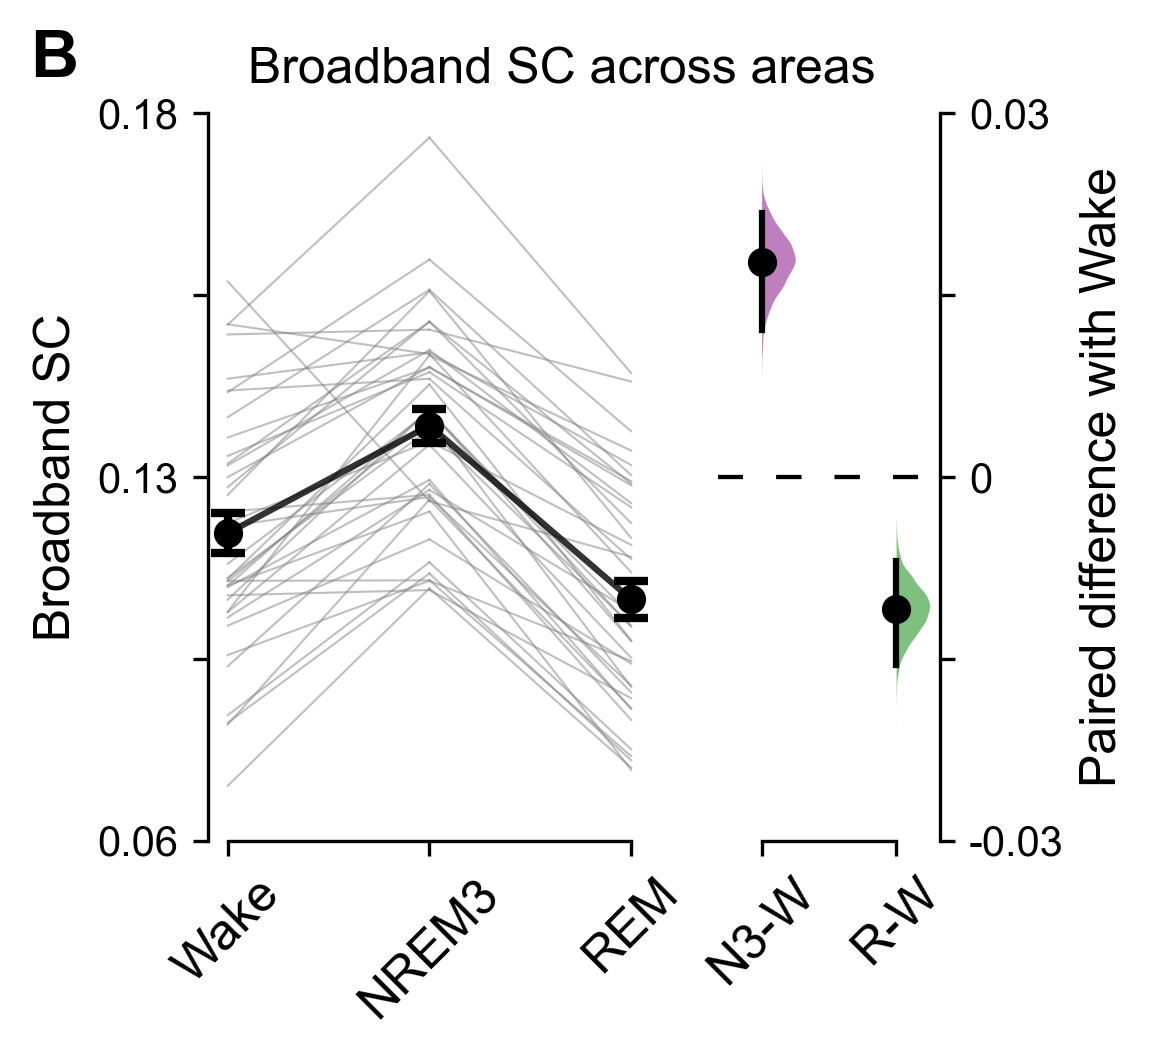

In [32]:
# Figure
fig, axs = plt.subplots(
    1,
    2,
    figsize=plots._get_figsize_inches((8., 8.)),
    width_ratios=[2, 1],
    dpi=300,
)

df_plot = df_avg_bb.set_index("region")

# Slope plot
axs[0] = plots.slope_plot(axs[0], df_plot)
# Plot parameters
axs[0].set_ylabel("Broadband SC", fontsize=plots.fsize.LABEL_SIZE)
axs[0].set_ylim(0.06, 0.18)
axs[0].set_yticks(
    np.linspace(0.06, 0.18, 5),
    labels=[0.06, "", 0.13, "", 0.18],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_xticks(
    range(len(stages)),
    [title_dict[stage] for stage in stages],
    rotation=45,
    ha="center",
    fontsize=plots.fsize.LABEL_SIZE,
)
plots._format_spines(axs[0], s_bounds={"bottom": (0, 2)})


# Add contrasts
def avg_diff(x, y):
    return np.mean(x - y)


# Plot differences
for i, stage in enumerate(stages[1:]):
    avg = avg_diff(df_plot[stage], df_plot["W"])
    pval = ttest_rel(df_plot[stage], df_plot["W"])[1]
    p_str = f"p = {pval:.2f}" if pval >= 0.001 else "p < 0.001"
    p_str += "*" if pval < 0.05 else ""
    res_boot = bootstrap(
        (df_plot[stage], df_plot["W"]),
        avg_diff,
        paired=True,
        random_state=290496,
    )
    print(
        "diff W -",
        stage,
        ":",
        avg,
        "ci",
        list(res_boot.confidence_interval),
        "pval:",
        pval,
    )
    axs[1] = plots.half_violin_plot(
        axs[1],
        avg,
        x_pos=i,
        ci=list(res_boot.confidence_interval),
        y_boot=res_boot.bootstrap_distribution,
        color=stage_colors[stage],
        pval=None,
        add_line=True
    )
# Plot parameters
axs[1].set_ylabel("Paired difference with Wake", fontsize=plots.fsize.LABEL_SIZE)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylim(-0.03, 0.03)
axs[1].set_yticks(
    np.linspace(-0.03, 0.03, 5),
    labels=[-0.03, "", 0, "", 0.03],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[1].set_xticks(
    range(len(stages) - 1),
    [stage + "-W" for stage in stages[1:]],
    rotation=45,
    fontsize=plots.fsize.LABEL_SIZE,
)
plots._format_spines(axs[1], s_inv=["top", "left"], s_bounds={"bottom": (0, 1)})

# Annotate panel
axs[0].text(-0.4, 1.05, "B", transform=axs[0].transAxes, size=16, weight='bold')

fig.suptitle("Broadband SC across areas", y=0.95, fontsize=plots.fsize.TITLE_SIZE)

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"sc_bb_regions.svg"))
plt.show()

diff W - N3 : 0.0032899387438752995 ci [0.0023363834888720744, 0.004306826901544419] pval: 2.1061484410650203e-07
diff W - R : -0.001389598095737871 ci [-0.0025767669600004523, -0.0004817153650767585] pval: 0.012721325693381354


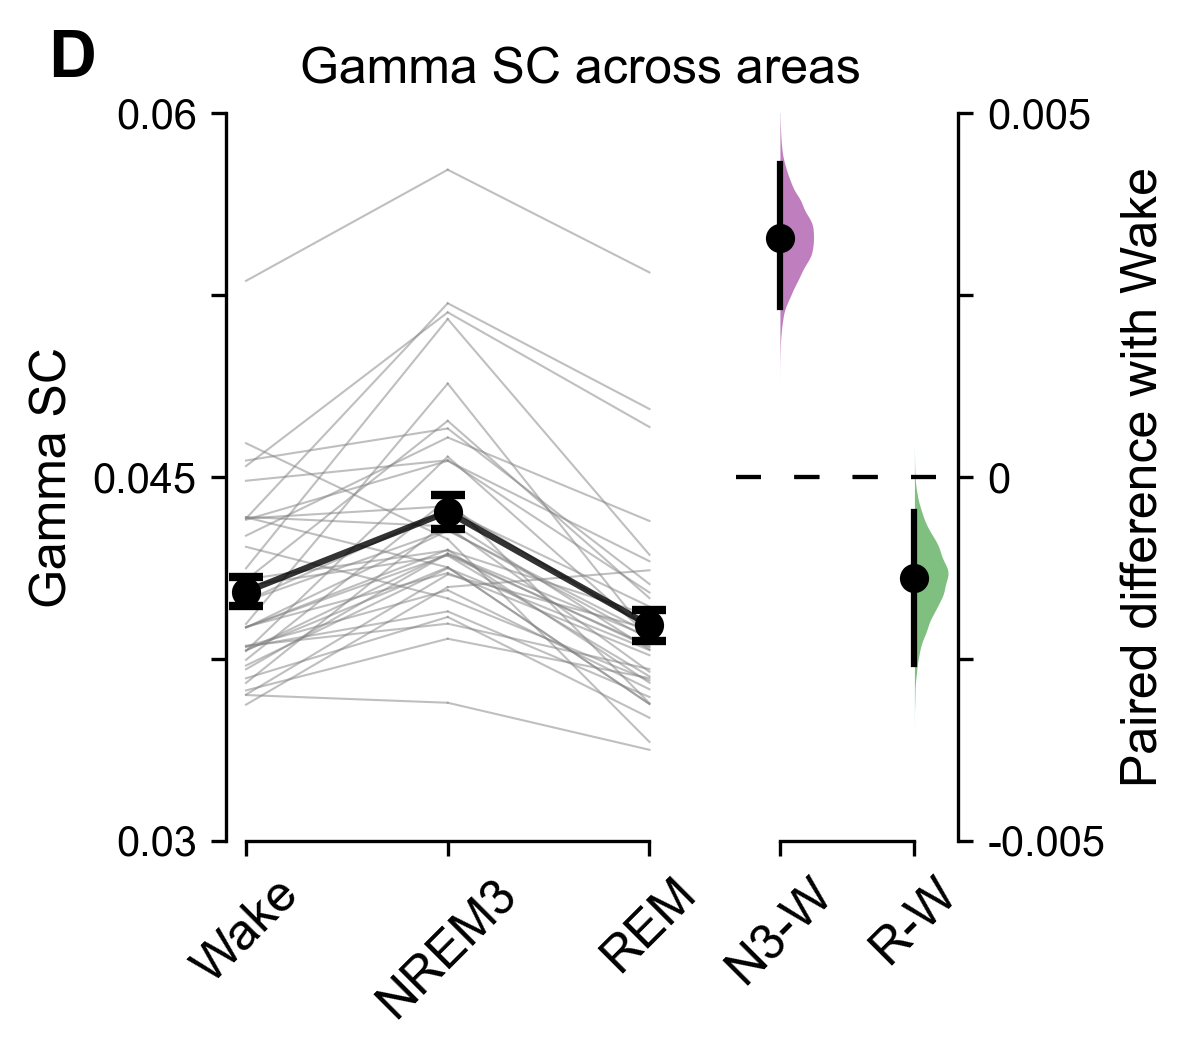

In [34]:
# Figure
fig, axs = plt.subplots(
    1,
    2,
    figsize=plots._get_figsize_inches((8., 8.)),
    width_ratios=[2, 1],
    dpi=300,
)

df_plot = df_avg_gamma.set_index("region")

# Slope plot
axs[0] = plots.slope_plot(axs[0], df_plot)
# Plot parameters
axs[0].set_ylabel("Gamma SC", fontsize=plots.fsize.LABEL_SIZE)
axs[0].set_ylim(0.03, 0.06)
axs[0].set_yticks(
    np.linspace(0.03, 0.06, 5),
    labels=[0.03, "", 0.045, "", 0.06],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[0].set_xticks(
    range(len(stages)),
    [title_dict[stage] for stage in stages],
    rotation=45,
    ha="center",
    fontsize=plots.fsize.LABEL_SIZE,
)
plots._format_spines(axs[0], s_bounds={"bottom": (0, 2)})


# Add contrasts
def avg_diff(x, y):
    return np.mean(x - y)


# Plot differences
for i, stage in enumerate(stages[1:]):
    avg = avg_diff(df_plot[stage], df_plot["W"])
    pval = ttest_rel(df_plot[stage], df_plot["W"])[1]
    p_str = f"p = {pval:.2f}" if pval >= 0.001 else "p < 0.001"
    p_str += "*" if pval < 0.05 else ""
    res_boot = bootstrap(
        (df_plot[stage], df_plot["W"]),
        avg_diff,
        paired=True,
        random_state=290496,
    )
    print(
        "diff W -",
        stage,
        ":",
        avg,
        "ci",
        list(res_boot.confidence_interval),
        "pval:",
        pval,
    )
    axs[1] = plots.half_violin_plot(
        axs[1],
        avg,
        x_pos=i,
        ci=list(res_boot.confidence_interval),
        y_boot=res_boot.bootstrap_distribution,
        color=stage_colors[stage],
        pval=None,
        add_line=True
    )
# Plot parameters
axs[1].set_ylabel("Paired difference with Wake", fontsize=plots.fsize.LABEL_SIZE)
axs[1].yaxis.set_label_position("right")
axs[1].yaxis.tick_right()
axs[1].set_ylim(-0.005, 0.005)
axs[1].set_yticks(
    np.linspace(-0.005, 0.005, 5),
    labels=[-0.005, "", 0, "", 0.005],
    fontsize=plots.fsize.TICK_SIZE,
)
axs[1].set_xticks(
    range(len(stages) - 1),
    [stage + "-W" for stage in stages[1:]],
    rotation=45,
    fontsize=plots.fsize.LABEL_SIZE,
)
plots._format_spines(axs[1], s_inv=["top", "left"], s_bounds={"bottom": (0, 1)})

# Annotate panel
axs[0].text(-0.4, 1.05, "D", transform=axs[0].transAxes, size=16, weight='bold')

fig.suptitle("Gamma SC across areas", y=0.95, fontsize=plots.fsize.TITLE_SIZE)

# Save figure
plots.save_figure(fig, fig_path.joinpath(f"sc_gamma_regions.svg"))
plt.show()

### C) Correlations of TC / SC

In [23]:
print("Computing for Broadband...")
df_rhos_d_bb = utils.get_tc_sc_corr(
    df_avg_d_bb, df_avg_tau_bb, stages, map_coords, corr_type=corr_type
)
print("Computing for gamma...")
df_rhos_d_gamma = utils.get_tc_sc_corr(
    df_avg_d_gamma, df_avg_tau_gamma, stages, map_coords, corr_type=corr_type
)

Computing for Broadband...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
Computing for gamma...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permut

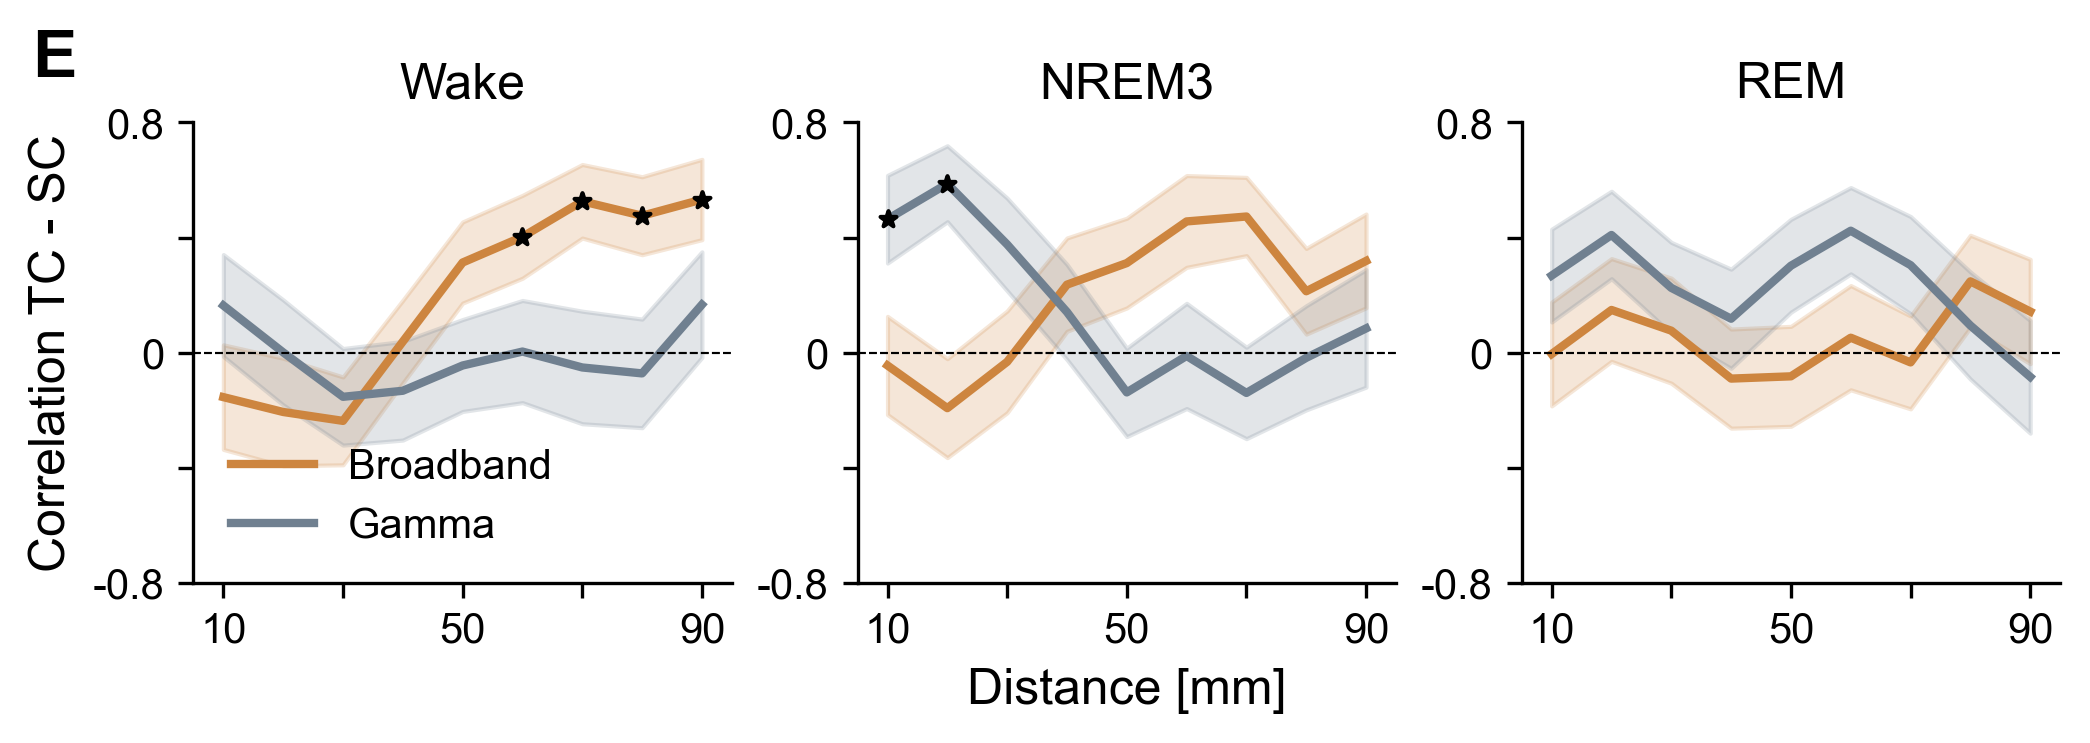

In [24]:
fig, axs = plt.subplots(
    1, 3, figsize=plots._get_figsize_inches((17.4, 6)), dpi=300, layout="constrained"
)

for i, stage in enumerate(stages):
    # Plot for broadband
    plots.plot_tc_sc_corr(
        axs[i],
        df_rhos_d_bb[stage],
        color=type_colors["broadband"],
        color_stars="k",
        label="Broadband",
    )
    # Plot for gamma
    plots.plot_tc_sc_corr(
        axs[i],
        df_rhos_d_gamma[stage],
        color=type_colors["gamma"],
        color_stars="k",
        title=title_dict[stage],
        ylims=(-0.8, 0.8),
        xlabel="",  # "Distance [mm]",
        ylabel="",  # "Correlation TC - SC",
        label="Gamma",
    )

    axs[i].set_yticks(
        [-0.8, -0.4, 0, 0.4, 0.8],
        labels=[-0.8, "", 0, "", 0.8],
        fontsize=plots.fsize.TICK_SIZE,
    )
    axs[i].set_xticks(
        np.arange(10, 91, 20),
        labels=[10, "", 50, "", 90],
        fontsize=plots.fsize.TICK_SIZE,
    )
    plots._format_spines(
        axs[i]
    )  # , s_bounds={"left": (-0.8, 0.8), "bottom": (10, 120)})

# Plot customization
axs[0].set_ylabel("Correlation TC - SC", fontsize=plots.fsize.LABEL_SIZE)
axs[0].legend(frameon=False, fontsize=plots.fsize.TEXT_SIZE)
axs[1].set_xlabel("Distance [mm]", fontsize=plots.fsize.LABEL_SIZE)

# Annotate panel
axs[0].text(-0.3, 1.1, "E", transform=axs[0].transAxes, size=16, weight="bold")

plots.save_figure(fig, fig_path.joinpath(f"corr_tc_sc.svg"))
plt.show()

Control: check average TC-SC correltion, i.e. when considering all distances:

In [25]:
print("Computing for Broadband...")
df_avg_bb_all_d = df_avg_bb.copy()
df_avg_bb_all_d["distance"] = 60
df_rhos_d_bb = utils.get_tc_sc_corr(
    df_avg_bb_all_d, df_avg_tau_bb, stages, map_coords, corr_type=corr_type
)
print(df_rhos_d_bb)
print("Computing for gamma...")
df_avg_gamma_all_d = df_avg_gamma.copy()
df_avg_gamma_all_d["distance"] = 60
df_rhos_d_gamma = utils.get_tc_sc_corr(
    df_avg_gamma_all_d, df_avg_tau_gamma, stages, map_coords, corr_type=corr_type
)
print(df_rhos_d_gamma)

Computing for Broadband...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
{'W':          rho    rho_se   pval
60 -0.072109  0.177882  0.242, 'N3':          rho    rho_se   pval
60  0.055039  0.172942  0.495, 'R':          rho   rho_se   pval
60 -0.002954  0.16977  0.492}
Computing for gamma...
Generating 1000 permutations...
Generating 1000 permutations...
Generating 1000 permutations...
{'W':          rho   rho_se   pval
60  0.066419  0.19437  0.365, 'N3':          rho    rho_se   pval
60  0.412627  0.155445  0.006, 'R':          rho   rho_se   pval
60  0.222453  0.17666  0.088}


There seems to be an actual positive correlation in gamma only in N3 when considering all distances!

### S1) Alternative plot without fits

Broadband:

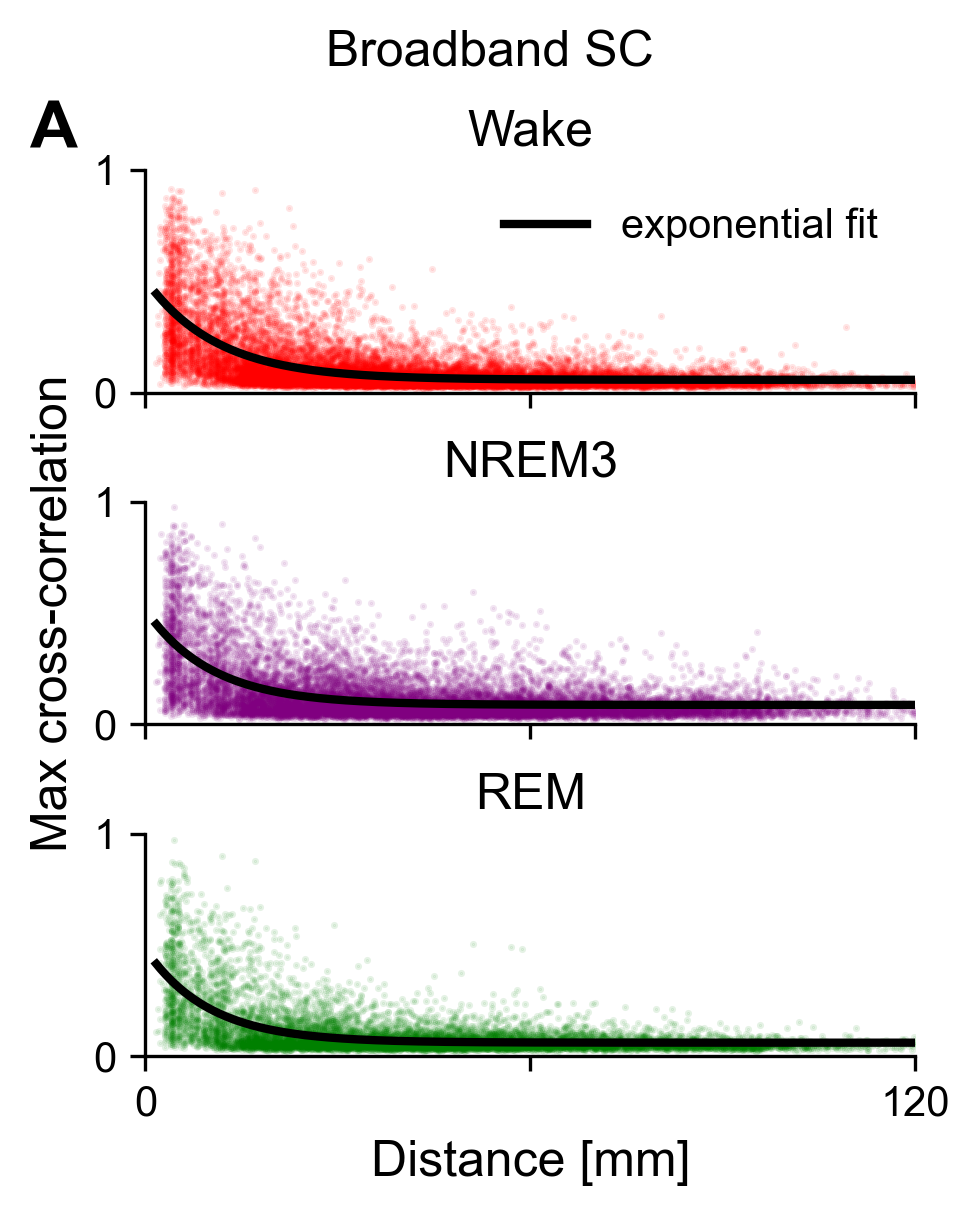

In [ ]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze()
    for stage, par in df_params_corr_bb.items()
}

fig, axs = plots.plot_sc_fit_2(
    df_sc_bb,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(8, 10),
)

fig.suptitle("Broadband SC", fontsize=plots.fsize.TITLE_SIZE)
# Adjust plot
# axs[0].set_ylim(0, 0.4)
# axs[0].set_yticks([0, 0.2, 0.4], labels=[0, 0.2, 0.4], fontsize=plots.fsize.TICK_SIZE)
# axs[0].set_title("Broadband SC", fontsize=plots.fsize.TITLE_SIZE)

# Annotate panel
axs[0].text(-0.15, 1.1, "A", transform=axs[0].transAxes, size=16, weight="bold")

plots.save_figure(fig, fig_path.joinpath("Fit_corr_broadband_2.svg"))
plt.show()

Gamma:

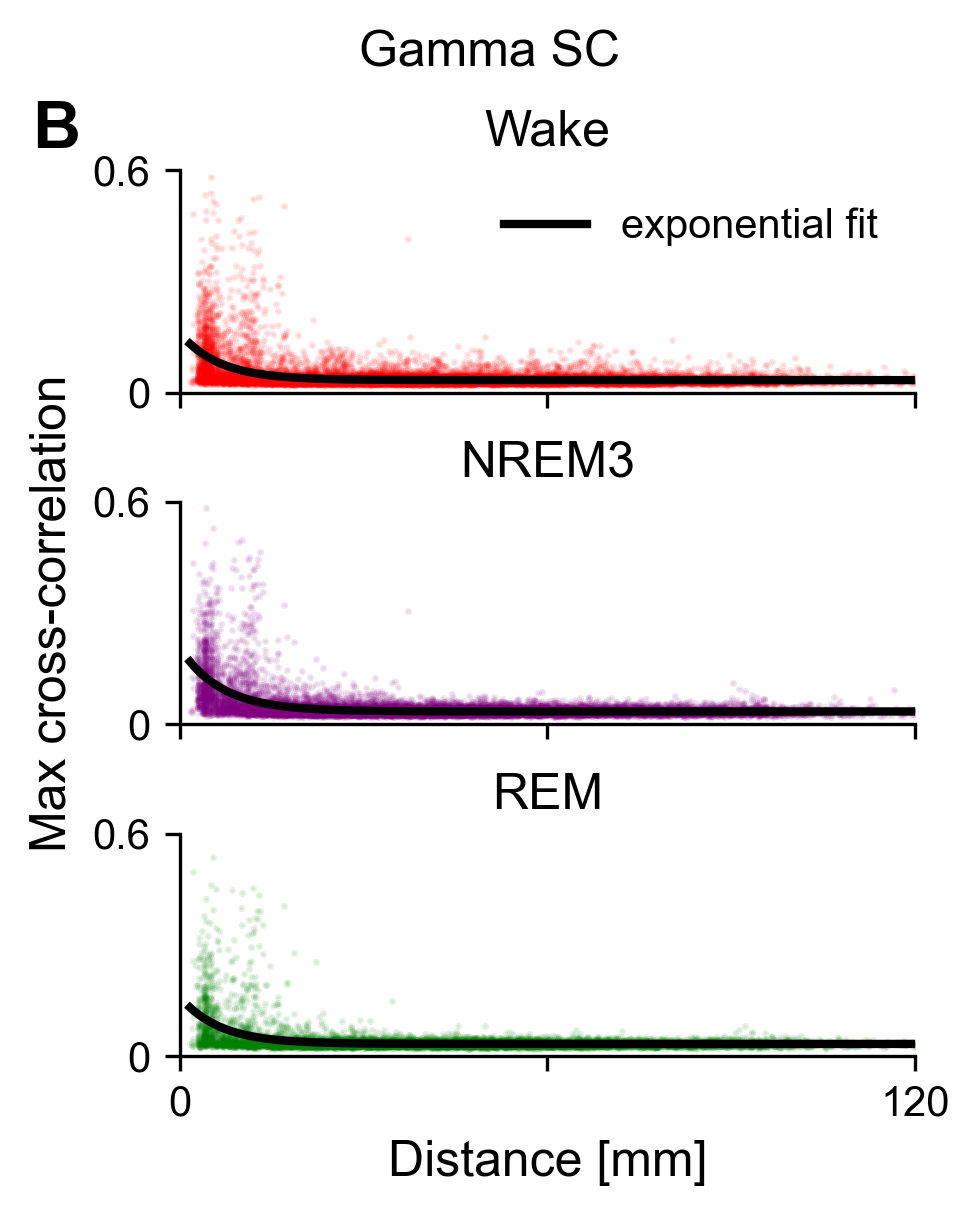

In [ ]:
params_stages = {
    stage: par.loc["all"].to_numpy().squeeze()
    for stage, par in df_params_corr_gamma.items()
}

fig, axs = plots.plot_sc_fit_2(
    df_sc_gamma,
    params_stages,
    stage_colors,
    dict_stages=title_dict,
    figsize=(8, 10),
    ylim=(0, 0.6),
)

fig.suptitle("Gamma SC", fontsize=plots.fsize.TITLE_SIZE)

# Annotate panel
axs[0].text(-0.2, 1.1, "B", transform=axs[0].transAxes, size=16, weight="bold")

plots.save_figure(fig, fig_path.joinpath("Fit_corr_gamma_2.svg"))
plt.show()

### Supp) LME with statsmodels

In [ ]:
# This reproduces R's nlme output, but it's incredibly slow...
md = smf.mixedlm(
    "corr ~ C(stage, Treatment(reference='W'))",
    df_sc_bb_all_stages,
    groups="pat",
    re_formula="1",
    vc_formula={"pair": "0 + C(pair)"},
)
mdf = md.fit(method="bfgs")
mdf.summary()